# Players EDA

### **Import libraries and data**

In [0]:
# just run this chunk of code and follow the prompt that it spits out
# install PyDrive
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# authenticate and create the PyDrive client
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
# import packages
import warnings
import numpy as np
import pandas as pd
import scipy
import scipy.stats as st
import statsmodels as sm
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import time
import seaborn as sns
from collections import Counter
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler

In [3]:
# Data importing
# Players file
link = 'https://drive.google.com/open?id=1LZsFQ4jbhwzXRUcVcE1UDRJERa8PCawB'
fluff, id = link.split('=')
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Players.csv')  
players_df = pd.read_csv('Players.csv')


# Champtype file
link = 'https://drive.google.com/open?id=1KryiVz602A1064qub6scDXNUEqa6uBqk'
fluff, id = link.split('=')
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Champtypes.csv')  
ChampType = pd.read_csv('Champtypes.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


**Histogram of champion by position/lanes**

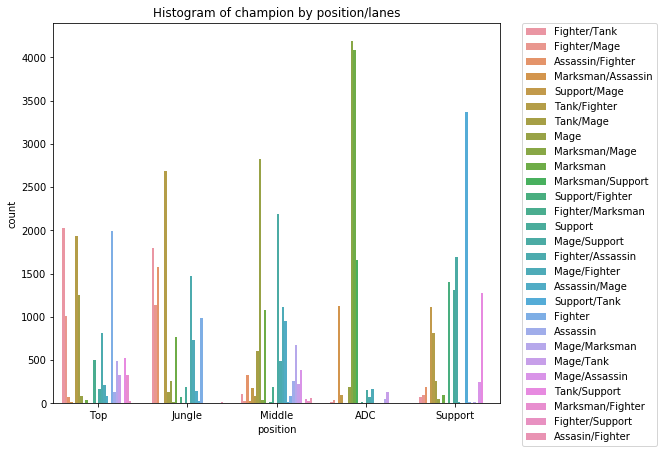

In [4]:
# plot the count of the champion types corresponding to each position
lb_make = LabelEncoder()
ChampType['ChampType'] = lb_make.fit_transform(ChampType["Type"])
champs_dct = dict(zip(ChampType["ChampType"], ChampType["Type"]))
players_df['Type'] = players_df['ChampType'].map(champs_dct)

plt.figure(figsize=(8, 7))
sns.countplot(x = 'position', hue = 'Type', data = players_df)
plt.title('Histogram of champion by position/lanes')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [5]:
players_df.groupby(['ChampType', 'position']).count()

gameid  league  playerid  ...  goldat15  xpat10  Type
ChampType position                            ...                        
1         Jungle        21      21        21  ...        21      21    21
          Middle        57      57        57  ...        57      57    57
          Top            5       5         5  ...         5       5     5
2         Jungle         3       3         3  ...         3       3     3
          Middle       263     263       263  ...       263     263   263
...                    ...     ...       ...  ...       ...     ...   ...
28        ADC            4       4         4  ...         4       4     4
          Jungle         6       6         6  ...         6       6     6
          Middle         1       1         1  ...         1       1     1
          Support     1278    1278      1278  ...      1278    1278  1278
          Top          529     529       529  ...       529     529   529

[117 rows x 31 columns]

##### **Find the top 20 champs for each position and their types - seperated by winning team and losing team**

###### Winning team top 20 champions selected

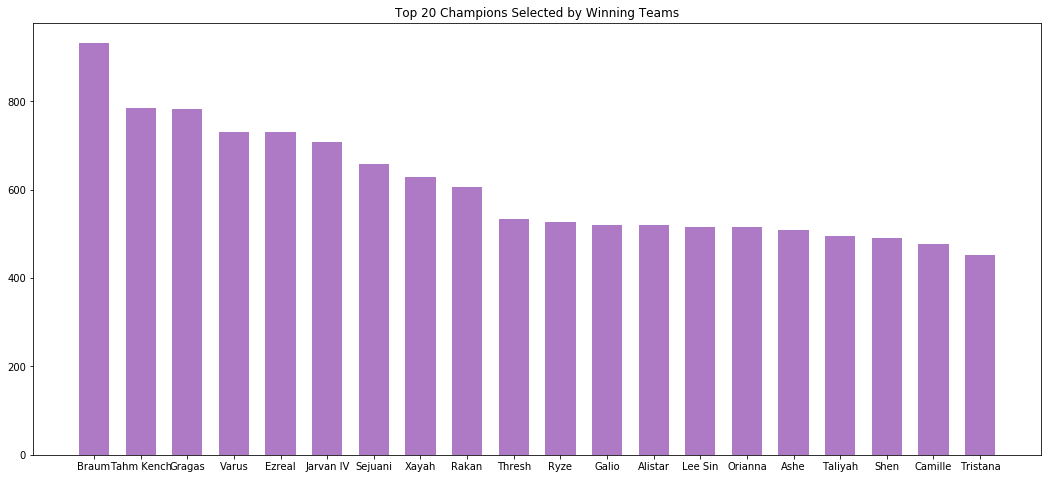

In [6]:
# check and list the top 20 champions have been selected from winning teams
winteam = players_df[players_df['result'] == 1]
champ_winteam = Counter(list(winteam['champion']))
sorted_champ_winteam = pd.DataFrame(list(champ_winteam.most_common())[0:20], columns = ['champ_win', 'count'])

fig = plt.figure(figsize=(14,6))
ax = fig.add_axes([0,0,1,1])
ax.bar(sorted_champ_winteam['champ_win'], sorted_champ_winteam['count'], color = '#AF7AC5', width = 0.65)
plt.title('Top 20 Champions Selected by Winning Teams')
plt.show()

###### Losing team top 20 champions selected

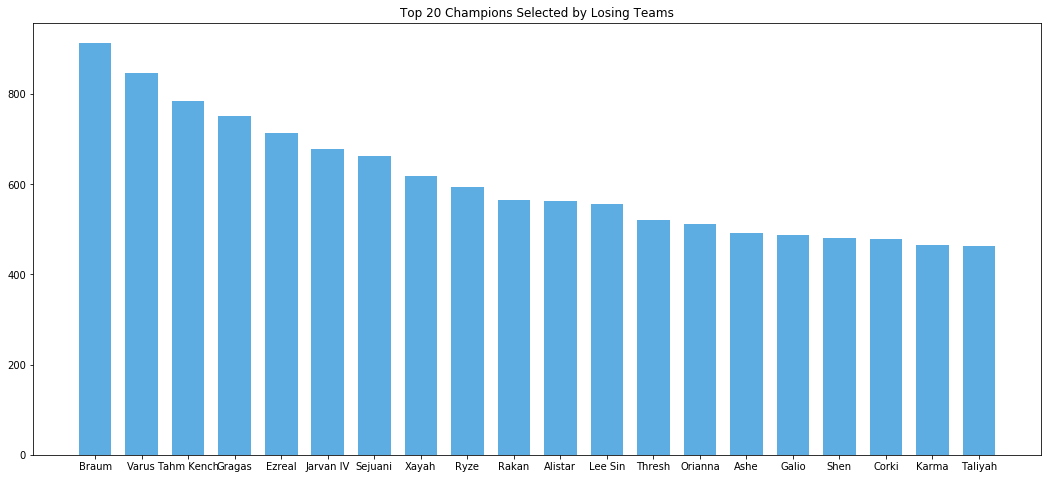

In [7]:
# Check and list the top 20 champions have been selected from losing teams
loseteam = players_df[players_df['result'] == 0]
champ_loseteam = Counter(list(loseteam['champion']))
sorted_champ_loseteam = pd.DataFrame(list(champ_loseteam.most_common())[0:20], columns = ['champ_lose', 'count'])

fig = plt.figure(figsize=(14,6))
ax = fig.add_axes([0,0,1,1])
ax.bar(sorted_champ_loseteam['champ_lose'], sorted_champ_loseteam['count'], color = '#5DADE2', width = 0.7)
plt.title('Top 20 Champions Selected by Losing Teams')
plt.show()

##### **Histograms of the top champions for ban 1-3 and for total bans**

###### Top 20 champs for the first ban

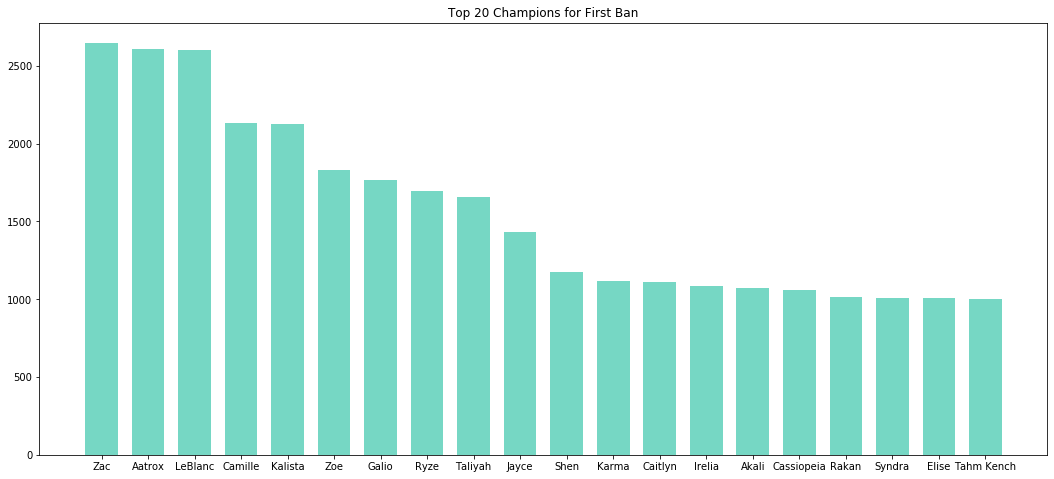

In [8]:
# Check the top 20 champions for ban1
ban1 = Counter(list(players_df['ban1']))
sorted_ban1 = pd.DataFrame(list(ban1.most_common())[0:20], columns = ['ban1', 'count'])

fig = plt.figure(figsize=(14,6))
ax = fig.add_axes([0,0,1,1])
ax.bar(sorted_ban1['ban1'], sorted_ban1['count'], color = '#76D7C4', width = 0.7)
plt.title('Top 20 Champions for First Ban')
plt.show()

###### Top 20 Champs for the second ban

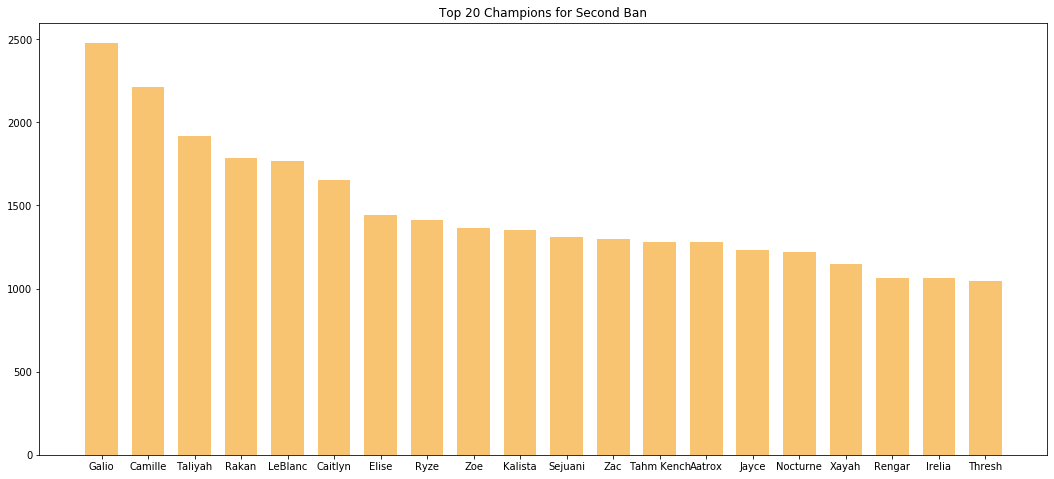

In [9]:
# Check the top 20 champions for ban2
ban2 = Counter(list(players_df['ban2']))
sorted_ban2 = pd.DataFrame(list(ban2.most_common())[0:20], columns = ['ban2', 'count'])

fig = plt.figure(figsize=(14,6))
ax = fig.add_axes([0,0,1,1])
ax.bar(sorted_ban2['ban2'], sorted_ban2['count'], color = '#F8C471', width = 0.7)
plt.title('Top 20 Champions for Second Ban')
plt.show()

###### Top 20 Champs for the third ban

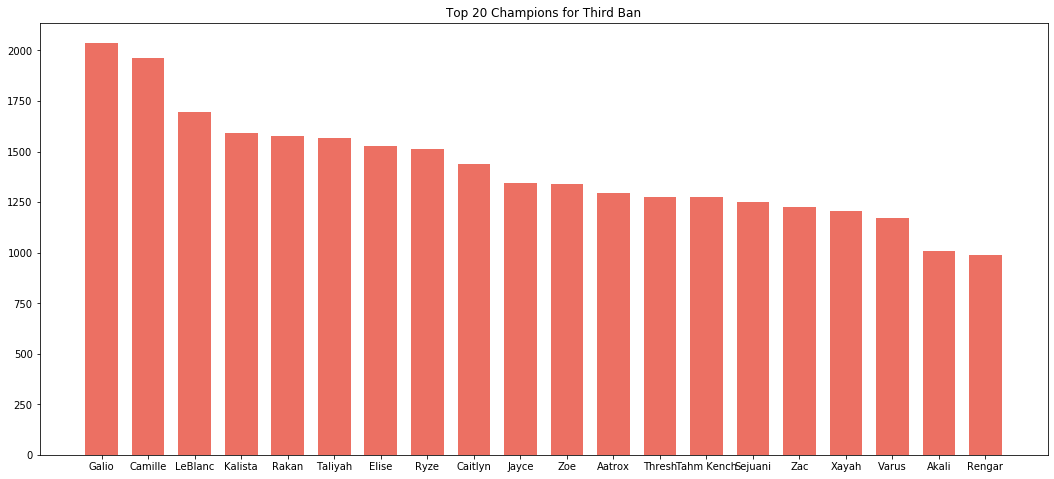

In [10]:
# Check the top 20 champions for ban3
ban3 = Counter(list(players_df['ban3']))
sorted_ban3 = pd.DataFrame(list(ban3.most_common())[0:20], columns = ['ban3', 'count'])

fig = plt.figure(figsize=(14,6))
ax = fig.add_axes([0,0,1,1])
ax.bar(sorted_ban3['ban3'], sorted_ban3['count'], color = '#EC7063', width = 0.7)
plt.title('Top 20 Champions for Third Ban')
plt.show()

###### Top 10 Combination of Champs for total bans

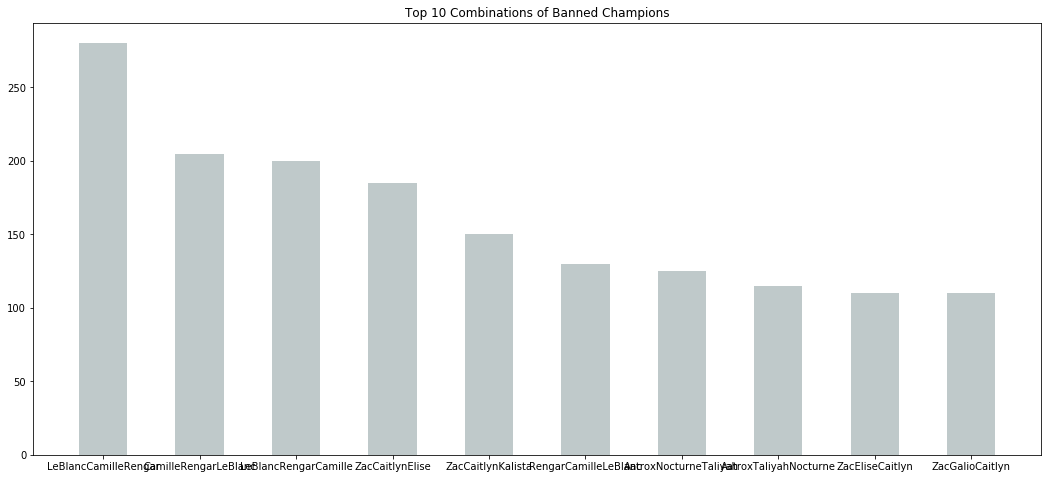

In [11]:
# Check the top 10 combination of banned champions
allbans = Counter(list(players_df['ban1'] + players_df['ban2'] + players_df['ban3']))
sorted_bans = pd.DataFrame(list(allbans.most_common())[0:10], columns = ['allbans', 'count'])
sorted_bans

fig = plt.figure(figsize=(14,6))
ax = fig.add_axes([0,0,1,1])
ax.bar(sorted_bans['allbans'], sorted_bans['count'], color = '#BFC9CA', width = 0.5)
plt.title('Top 10 Combinations of Banned Champions')
plt.show()

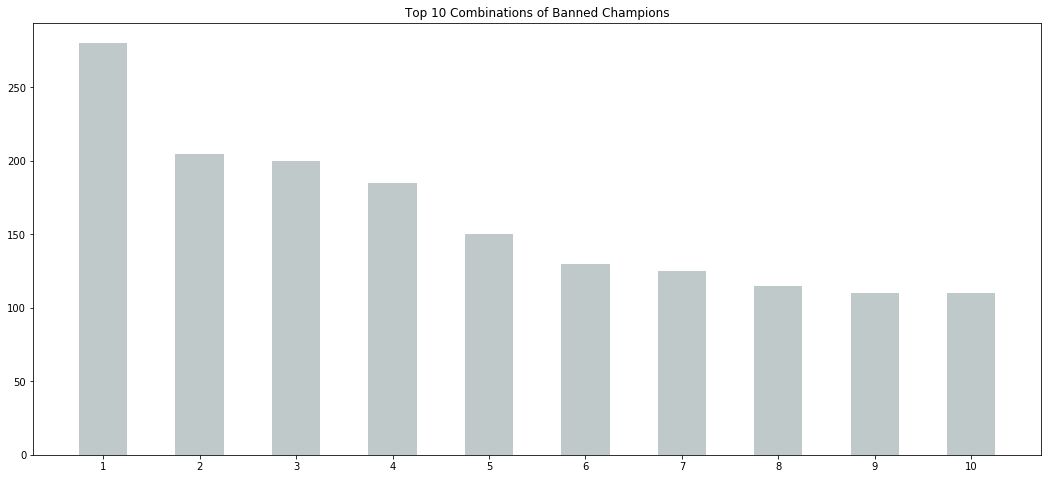

,Group,Champs,Counts
0,1,LeBlancCamilleRengar,280
1,2,CamilleRengarLeBlanc,205
2,3,LeBlancRengarCamille,200
3,4,ZacCaitlynElise,185
4,5,ZacCaitlynKalista,150
5,6,RengarCamilleLeBlanc,130
6,7,AatroxNocturneTaliyah,125
7,8,AatroxTaliyahNocturne,115
8,9,ZacEliseCaitlyn,110
9,10,ZacGalioCaitlyn,110


In [12]:
# Alternative Plot, (i think it's better to give the histogram and df at the same time)
# make dataframe of ban combinations dictionary
ban_comb_df = pd.DataFrame()
ban_comb_list = list(allbans.most_common())
ban_comb_dict = {}
for i in range(len(ban_comb_list)):
  ban_comb_dict[ban_comb_list[i][0]] = ban_comb_list[i][1]
ban_comb_df = pd.DataFrame.from_dict(ban_comb_dict,orient='index')
ban_comb_df = ban_comb_df.reset_index(drop=False)
ban_comb_df = ban_comb_df.reset_index(drop=False)
ban_comb_df = ban_comb_df.rename(columns={0:"Counts","index":"Champs","level_0":"Group"})
ban_comb_df['Group']+=1

fig = plt.figure(figsize=(14,6))
#fig.set_facecolor('w')
ax = fig.add_axes([0,0,1,1])
ax.bar(range(1,11), ban_comb_df['Counts'][0:10], color = '#BFC9CA', width = 0.5,tick_label = range(1,11))
ax.set_facecolor('w')
plt.title('Top 10 Combinations of Banned Champions')
plt.show()

ban_comb_df[:10]

### **Feature selection**

#### **Filter Method**

##### **Check for multicollinearity**

##### Check for winning team by using spearman corr

In [0]:
# Get the numeric data for winning team and remove the result column
players_num = players_df._get_numeric_data()
players_num.drop('gameid', axis = 1, inplace = True)
players_num.drop('playerid', axis = 1, inplace = True)
players_num_win = players_num[players_num['result'] == 1]
players_num_win.drop('result', axis = 1, inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


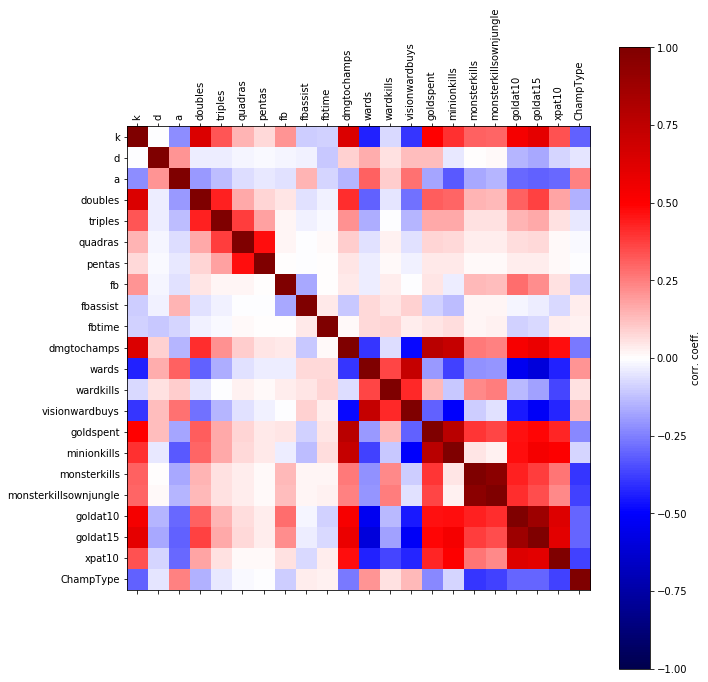

In [0]:
# method for correlation used here is spearman since there are categorical and numerical variables
corr_matrix_win = (players_num_win.corr(method="spearman"))
# visualize result from spearman corr for winning team 
plt.figure(figsize=(10,10))
plt.matshow(corr_matrix_win,vmin=-1,vmax=1,cmap='seismic',fignum=0)
plt.colorbar(label='corr. coeff.')
plt.xticks(np.arange(corr_matrix_win.shape[0]),list(corr_matrix_win.columns),rotation=90)
plt.yticks(np.arange(corr_matrix_win.shape[0]),list(corr_matrix_win.columns))
plt.tight_layout()
plt.show()

In [0]:
# due to symmetrical marix, we generate a triangle side of correlation matrix (upper) without diagonal (k=1)
corr_values_win = (corr_matrix_win.where(np.triu(np.ones(corr_matrix_win.shape),k=1).astype(np.bool))).stack()
# Sort the correlation values by highest to lowest
corr_values_win = (corr_values_win.sort_values(ascending=False))
# display correlations above 50%
corr_values_win[corr_values_win > 0.5]

monsterkills  monsterkillsownjungle    0.951646
goldat10      goldat15                 0.875964
goldspent     minionkills              0.768233
dmgtochamps   goldspent                0.766579
wards         visionwardbuys           0.723861
dmgtochamps   minionkills              0.722960
k             doubles                  0.636639
              dmgtochamps              0.634356
goldat10      xpat10                   0.628781
goldat15      xpat10                   0.607455
k             goldat15                 0.595674
dmgtochamps   goldat15                 0.572054
k             goldat10                 0.533823
minionkills   goldat15                 0.533593
dmgtochamps   goldat10                 0.524084
minionkills   xpat10                   0.504454
dtype: float64

##### Check for losing team by using spearman corr

In [0]:
# Get the numeric data for losing team and remove the result column
players_num_lose = players_num[players_num['result'] == 0]
players_num_lose.drop('result', axis = 1, inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


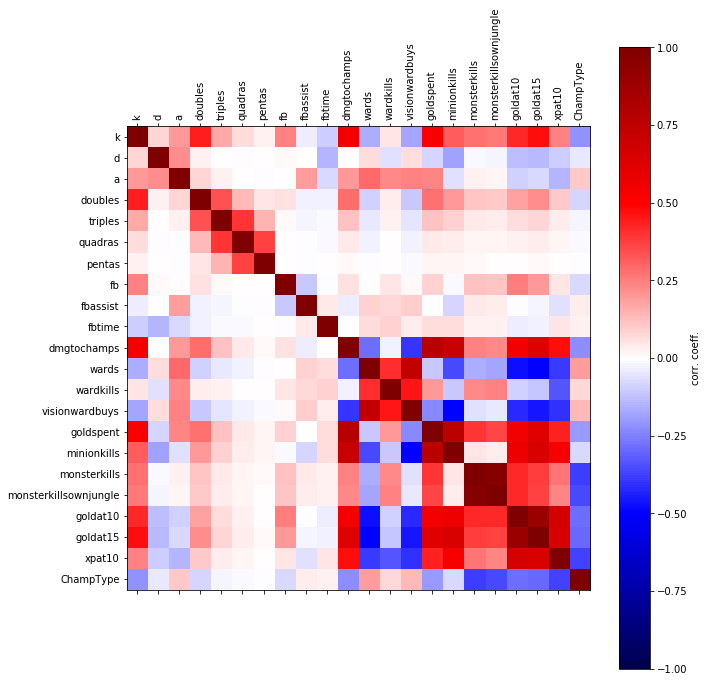

In [0]:
# method for correlation used here is spearman since there are categorical and numerical variables
corr_matrix_lose = (players_num_lose.corr(method="spearman"))
# visualize result from spearman corr for losing team 
plt.figure(figsize=(10,10))
plt.matshow(corr_matrix_lose,vmin=-1,vmax=1,cmap='seismic',fignum=0)
plt.colorbar(label='corr. coeff.')
plt.xticks(np.arange(corr_matrix_lose.shape[0]),list(corr_matrix_lose.columns),rotation=90)
plt.yticks(np.arange(corr_matrix_lose.shape[0]),list(corr_matrix_lose.columns))
plt.tight_layout()
plt.show()

In [0]:
# due to symmetrical marix, we generate a triangle side of correlation matrix (upper) without diagonal (k=1)
corr_values_lose = (corr_matrix_lose.where(np.triu(np.ones(corr_matrix_lose.shape),k=1).astype(np.bool))).stack()
# Sort the correlation values by highest to lowest
corr_values_lose = (corr_values_lose.sort_values(ascending=False))
# display correlations above 50%
corr_values_lose[corr_values_lose > 0.5]

monsterkills  monsterkillsownjungle    0.967345
goldat10      goldat15                 0.887660
dmgtochamps   goldspent                0.773144
goldspent     minionkills              0.761117
wards         visionwardbuys           0.735749
dmgtochamps   minionkills              0.714394
goldat10      xpat10                   0.660241
goldat15      xpat10                   0.645180
minionkills   goldat15                 0.643854
dmgtochamps   goldat15                 0.619664
goldspent     goldat15                 0.613538
minionkills   goldat10                 0.556897
dmgtochamps   goldat10                 0.540914
goldspent     goldat10                 0.539080
k             dmgtochamps              0.537358
minionkills   xpat10                   0.525170
k             goldspent                0.513444
dtype: float64

1. The correlation between 'monsterkills' and 'monsterkillsownjungle' is too high so we can remove the 'monsterkills' so the 'monsterkillsownjungle' can represent it
2. We can make the 'gold difference' as an independent variable between the 'goldat10' and 'goldat15' so the relations between these two features will not be highly correlated when doing clustering
3. 'wards' and 'visionwardbuys' can be represented by 'wards'

In [0]:
# calling categorical variables
categoricalcols = players_df.select_dtypes(include=['object','category'])
print(categoricalcols.columns)

# # calling variables with 2 (dummy) or 3 unique values
# factorvariables = []
# for i in players_df.columns:
#     if players_df[i].nunique() <= 15:
#         factorvariables.append(i)
# factorvariables.remove('result')
# print(factorvariables)

# # convert dummy variables to categorical variables
# players_df_new = players_df
# players_df_new[factorvariables] = players_df[factorvariables].apply(lambda x:x.astype('category'),axis=0)
# print(players_df_new[factorvariables].dtypes)

X = players_df.drop(['playerid','result'], inplace= False, axis = 1)
Y = players_df['result']
#X[categoricalcols.columns] = pd.Categorical(X[categoricalcols.columns])
for i in categoricalcols.columns:
  X[i] = pd.Categorical(X[i])
  X[i] = X[i].cat.codes

Index(['league', 'position', 'champion', 'ban1', 'ban2', 'ban3',
       'visionwards'],
      dtype='object')


#### **Apply sequential feature selection to identify important predictors**

Sequential feature selection algorithms are a family of greedy search algorithms that are used to reduce an initial d-dimensional feature space to a k-dimensional feature subspace where k < d. The motivation behind feature selection algorithms is to automatically select a subset of features that is most relevant to the problem. The goal of feature selection is two-fold: We want to improve the computational efficiency and reduce the generalization error of the model by removing irrelevant features or noise. A wrapper approach such as sequential feature selection is especially useful if embedded feature selection -- for example, a regularization penalty like LASSO -- is not applicable.

In a nutshell, SFAs remove or add one feature at the time based on the classifier performance until a feature subset of the desired size k is reached.

Four sequential feature selections that we will use here are:
1. Sequential Forward Selection
2. Sequential Backward Selection
3. Sequential Forward Floating Selection
4. Sequential Backward Floating Selection

###### Sequential Forward Selection (SFS)

In [0]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LogisticRegression

sffs_forward = SFS(LogisticRegression(C=1000, solver='liblinear', random_state=49),
           k_features = 10, verbose=0, scoring='accuracy',
           forward = True,cv = 0)
sffs_forward.fit(X.to_numpy(),Y, custom_feature_names=X.columns)
SFS_featuresselected= sffs_forward.k_feature_names_
print(SFS_featuresselected)
print(sffs_forward.k_score_)

('position', 'champion', 'ban1', 'k', 'd', 'a', 'fbassist', 'dmgtochamps', 'wards', 'ChampType')
0.863060817547358


#####Sequential Backward Selection (SBS)

In [0]:
sbs_backward = SFS(LogisticRegression(C=1000, solver='liblinear', random_state=23),
           k_features = 10, verbose=0, scoring='accuracy',
           forward = False,cv = 3)  #3 fold cross validation, select top 10 features, Logistic Regression Classifier
sbs_backward.fit(X.to_numpy(),Y, custom_feature_names=X.columns)
SBS_featuresselected = sbs_backward.k_feature_names_
print(SBS_featuresselected)
print(sbs_backward.k_score_)

('k', 'd', 'a', 'dmgtochamps', 'goldspent', 'minionkills', 'monsterkills', 'monsterkillsownjungle', 'goldat15', 'ChampType')
0.8668162180126288


#####Sequential Forward Floating Selection(SFFS)

In [0]:
sffs = SFS(LogisticRegression(C=1000, solver='liblinear', random_state=23),
           k_features = 10, verbose=0, scoring='accuracy',
           forward = True,floating = True,cv = 3) #3 fold cross validation, select top 10 features, Logistic Regression Classifier

sffs.fit(X.to_numpy(),Y, custom_feature_names=X.columns)
SFFS_featuresselected = sffs.k_feature_names_
print(SFFS_featuresselected)
print(sffs.k_score_)

('league', 'position', 'k', 'd', 'a', 'triples', 'pentas', 'wards', 'minionkills', 'ChampType')
0.8624958457959454


#####Sequential Backward Floating Selection(SBFS)

In [0]:
sbfs = SFS(LogisticRegression(C=1000, solver='liblinear', random_state=23),
           k_features = 10, verbose=0, scoring='accuracy',
           forward = False,floating = True,cv = 3) #3 fold cross validation, select top 10 features, Logistic Regression Classifier

sbfs.fit(X.to_numpy(),Y, custom_feature_names=X.columns)
SBFS_featuresselected = sbfs.k_feature_names_
print(SBFS_featuresselected)
print(sbfs.k_score_)

('k', 'd', 'a', 'dmgtochamps', 'goldspent', 'minionkills', 'monsterkills', 'monsterkillsownjungle', 'goldat15', 'ChampType')
0.8668162180126288


##### Comparison Between SFS, SBS, SFFS & SBFS

In [0]:
print('\nSequential Forward Selection (k=10 & cv=3):')
print(SFS_featuresselected)
print('CV Score:')
print(sffs_forward.k_score_)

print('\nSequential Backward Selection (k=10 & cv=3):')
print(SBS_featuresselected)
print('CV Score:')
print(sbs_backward.k_score_)

print('\nSequential Forward Floating Selection (k=10 & cv=3):')
print(SFFS_featuresselected)
print('CV Score:')
print(sffs.k_score_)

print('\nSequential Backward Floating Selection (k=10 & cv=3):')
print(SBFS_featuresselected)
print('CV Score:')
print(sbfs.k_score_)

print('\nSimilar features in SFS, SBS, SFFS, & SBFS:')
#intersection of similar features
for i in sffs_forward.k_feature_names_:
  if i in sbs_backward.k_feature_names_:
    if i in sffs.k_feature_names_:
      if i in sbfs.k_feature_names_:
        print(i)


Sequential Forward Selection (k=10 & cv=3):
('position', 'champion', 'ban1', 'k', 'd', 'a', 'fbassist', 'dmgtochamps', 'wards', 'ChampType')
CV Score:
0.863060817547358

Sequential Backward Selection (k=10 & cv=3):
('k', 'd', 'a', 'dmgtochamps', 'goldspent', 'minionkills', 'monsterkills', 'monsterkillsownjungle', 'goldat15', 'ChampType')
CV Score:
0.8668162180126288

Sequential Forward Floating Selection (k=10 & cv=3):
('league', 'position', 'k', 'd', 'a', 'triples', 'pentas', 'wards', 'minionkills', 'ChampType')
CV Score:
0.8624958457959454

Sequential Backward Floating Selection (k=10 & cv=3):
('k', 'd', 'a', 'dmgtochamps', 'goldspent', 'minionkills', 'monsterkills', 'monsterkillsownjungle', 'goldat15', 'ChampType')
CV Score:
0.8668162180126288

Similar features in SFS, SBS, SFFS, & SBFS:
k
d
a
ChampType


#### Comparing sequential selection with regularized and tree methods in Sklearn module 

In [0]:
scaler = StandardScaler()
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

##### Selecting features using Lasso regularisation from SelectFromModel and Logistic

In [0]:
l1selection = SelectFromModel(LogisticRegression(C=1, penalty='l1', solver='liblinear'))
l1selection.fit(scaler.transform(X), Y)

# get list of selected features
lasso1_selection = X.columns[(l1selection.get_support())]
print('total features: {}'.format((X.shape[1])))
print('selected features: {}'.format((lasso1_selection)))
# Find feature that were regularized
print('features with coefficients shrank to zero: {}'.format(
     X.columns[(l1selection.estimator_.coef_ == 0).ravel().tolist()]))

total features: 30
selected features: Index(['gameid', 'league', 'position', 'champion', 'ban1', 'ban2', 'ban3', 'k',
       'd', 'a', 'doubles', 'triples', 'quadras', 'pentas', 'fb', 'fbassist',
       'fbtime', 'dmgtochamps', 'wards', 'wardkills', 'visionwards',
       'visionwardbuys', 'goldspent', 'minionkills', 'monsterkills',
       'monsterkillsownjungle', 'goldat10', 'goldat15', 'xpat10', 'ChampType'],
      dtype='object')
features with coefficients shrank to zero: Index([], dtype='object')


##### Selecting features using Tree Model from SelectFromModel and RandomForest Classifier

In [0]:
extratree = ExtraTreesClassifier(n_estimators=50)
extratree.fit(X,Y)
# Computing the importance of each feature 
tree_features =  extratree.feature_importances_

# Normalizing the individual importances 
feature_importance_normalized = np.std([tree.feature_importances_ for tree in 
                                        extratree.estimators_], 
                                        axis = 0)

tree_featureslist = pd.DataFrame({'Features':X.columns,
                                  'Importance': feature_importance_normalized})

filtered_tree_features = tree_featureslist.sort_values(by=['Importance'], 
                                                       ascending=False).head(15)
                                                  
print(filtered_tree_features)

                 Features  Importance
9                       a    0.041971
8                       d    0.032200
7                       k    0.025394
10                doubles    0.014526
22              goldspent    0.006700
11                triples    0.005467
27               goldat15    0.005222
17            dmgtochamps    0.004911
24           monsterkills    0.003696
26               goldat10    0.003023
18                  wards    0.002935
25  monsterkillsownjungle    0.002753
29              ChampType    0.002620
23            minionkills    0.002469
19              wardkills    0.002412


#### Features selected by all the methods of feature selection applied

In [0]:
selected_features = pd.DataFrame.from_dict({
    'SFS_features'       : SFS_featuresselected,
    'SBS features'       : SBS_featuresselected, 
    'SFFS features'      : SFFS_featuresselected,
    'SBFS features'      : SBFS_featuresselected,
    'Lasso L1 penalty'   : lasso1_selection[:15], 
    'Tree top features'  : filtered_tree_features['Features']
}, orient='index').T

#### Final Variables Selected

In [0]:
selected_features

,SFS_features,SBS features,SFFS features,SBFS features,Lasso L1 penalty,Tree top features
0,position,k,league,k,gameid,a
1,champion,d,position,d,league,d
2,ban1,a,k,a,position,k
3,k,dmgtochamps,d,dmgtochamps,champion,doubles
4,d,goldspent,a,goldspent,ban1,goldspent
5,a,minionkills,triples,minionkills,ban2,triples
6,fbassist,monsterkills,pentas,monsterkills,ban3,goldat15
7,dmgtochamps,monsterkillsownjungle,wards,monsterkillsownjungle,k,dmgtochamps
8,wards,goldat15,minionkills,goldat15,d,monsterkills
9,ChampType,ChampType,ChampType,ChampType,a,goldat10


In [0]:
# Based on above, we can select the features needed, combine some of them and do feature engineering. 
# Calculate the KDA first
# KDA calculation should be Kills + Assists : Death
# If Death is zero, then it should be divided by 0
# So first replace all deaths of 0 to 1
players_df['d'] = players_df['d'].replace(0, 1)
players_df['KDA'] = (players_df['k'] + players_df['a']) / players_df['d']
# Calculate the difference of the gold at 10 and 15
players_df['golddiff'] = players_df['goldat15'] - players_df['goldat10']
# Add one more feature of more than doublekills
# Add only one feature regarding these four columns is because in high-level of competition of the games
# More kills will only happen during the teamfight and it only happened when one team was leading way ahead
# During World competitions, teams are almost the same level, it's very rare to have this kind of situation
players_df['morekills'] = players_df['doubles'] + players_df['triples'] + players_df['quadras'] + players_df['pentas']

Based on the dataframe above, the final set of selected features that would be used for clustering is:
- Damage to champions (dmgtochamps)
- Number of wards placed by player(wards)
- Total minions killed by player (minionkills)
- Neutral monsters killed in own jungle (monsterkillsownjungle)
- Player XP gained at 10 minutes(xpat10)
- Combined kills and assist divided by death(KDA)
- Difference between gold at min 10 and min 15(golddiff)
- Number of times player get more than 1 kill  in a single battle (morekills)


[Text(0, 0.5, 'dmgtochamps'),
 Text(0, 1.5, 'wards'),
 Text(0, 2.5, 'minionkills'),
 Text(0, 3.5, 'monsterkillsownjungle'),
 Text(0, 4.5, 'xpat10'),
 Text(0, 5.5, 'KDA'),
 Text(0, 6.5, 'golddiff'),
 Text(0, 7.5, 'morekills')]

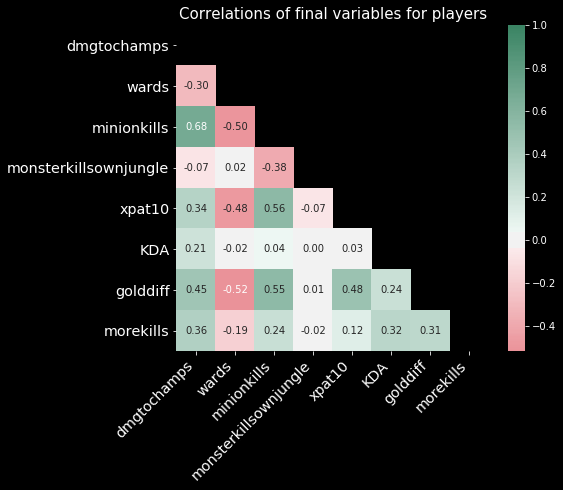

In [0]:
#Correlation Plot of Final Features
features_selected = ['dmgtochamps','wards','minionkills','monsterkillsownjungle','xpat10',
            'KDA','golddiff','morekills']

plt.style.use('dark_background')

df_corr = players_df[features_selected]
m = np.zeros_like(df_corr.corr(method = 'pearson'), dtype=np.bool)
m[np.triu_indices_from(m)] = True
cmap = sns.diverging_palette(10, 150, as_cmap=True)

plt.figure(figsize = (7,6))
chart = sns.heatmap(df_corr.corr(), cmap = cmap, annot = True, fmt = '.2f', mask = m, center = 0,linecolor=None)
plt.title('Correlations of final variables for players', fontsize=15)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45,horizontalalignment='right',fontweight='light',
    fontsize='x-large')
chart.set_yticklabels(chart.get_yticklabels(), fontweight='light',fontsize='x-large')